## 1. IMPORTANDO O DATAFRAME E AS BIBLIOTECAS

In [2]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar a base de dados
df = pd.read_csv('cancelamentos_original.csv')

# Exibir as primeiras linhas
print("Primeiras linhas do DataFrame:")
display(df.head())

# Informações sobre os dados
print("\nInformações gerais da base:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df.describe(include='all'))


Primeiras linhas do DataFrame:


,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0



Informações gerais da base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              881664 non-null  float64
 1   idade                   881664 non-null  float64
 2   sexo                    881664 non-null  object 
 3   tempo_como_cliente      881663 non-null  float64
 4   frequencia_uso          881663 non-null  float64
 5   ligacoes_callcenter     881664 non-null  float64
 6   dias_atraso             881664 non-null  float64
 7   assinatura              881661 non-null  object 
 8   duracao_contrato        881663 non-null  object 
 9   total_gasto             881664 non-null  float64
 10  meses_ultima_interacao  881664 non-null  float64
 11  cancelou                881664 non-null  float64
dtypes: float64(9), object(3)
memory usage: 80.7+ MB

Estatísticas descritivas:


,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
count,881664.000000,881664.000000,881664,881663.000000,881663.000000,881664.000000,881664.000000,881661,881663,881664.000000,881664.000000,881664.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Standard,Annual,NaN,NaN,NaN
freq,NaN,NaN,500504,NaN,NaN,NaN,NaN,298255,354396,NaN,NaN,NaN
mean,225398.667955,39.373153,NaN,31.256312,15.807496,3.604437,12.965722,NaN,NaN,631.616223,14.480868,0.567107
std,129531.845091,12.442362,NaN,17.255713,8.586241,3.070216,8.258058,NaN,NaN,240.802865,8.596203,0.495476
min,2.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,NaN,16.000000,9.000000,1.000000,6.000000,NaN,NaN,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,NaN,32.000000,16.000000,3.000000,12.000000,NaN,NaN,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,NaN,46.000000,23.000000,6.000000,19.000000,NaN,NaN,830.000000,22.000000,1.000000


## 2. REALIZANDO O TRATAMENTO DOS DADOS DO DATAFRAME: 

    Elementos Faltantes
    Variavél Categórica
    Normalização dos Dados
    Validação dos Dados
    Visualização dos Dados (Matriz de Correlação e  BoxPlots)


## 2.1 - ELEMENTOS FALTANTES

In [3]:
# Verificando valores ausentes
valores_ausentes = df.isnull().sum()
porcentagem_ausentes = 100 * valores_ausentes / len(df)

# Criando DataFrame de colunas com valores ausentes
faltantes = pd.DataFrame({
    'Quantidade de Nulos': valores_ausentes,
    'Porcentagem (%)': porcentagem_ausentes
}).query('`Quantidade de Nulos` > 0').sort_values(by='Porcentagem (%)', ascending=False)

# Exibindo o resultado
if faltantes.empty:
    print("A planilha 'cancelamentos_original.csv' **não possui valores faltantes**.")
else:
    print("Colunas com valores ausentes:\n")
    display(faltantes.style.format({'Porcentagem (%)': '{:.2f}'}))


Colunas com valores ausentes:



,Quantidade de Nulos,Porcentagem (%)
assinatura,5,0.00
tempo_como_cliente,3,0.00
frequencia_uso,3,0.00
duracao_contrato,3,0.00
CustomerID,2,0.00
idade,2,0.00
sexo,2,0.00
ligacoes_callcenter,2,0.00
dias_atraso,2,0.00
total_gasto,2,0.00


In [4]:
colunas_valores_nulos = [
    'CustomerID', 'cancelou', 'idade', 'sexo', 'tempo_como_cliente', 
    'frequencia_uso', 'ligacoes_callcenter', 'dias_atraso',
    'assinatura', 'duracao_contrato', 'total_gasto', 'meses_ultima_interacao'
]

# Contando quantas linhas possuem pelo menos um valor nulo nessas colunas
linhas_com_nulos = df[colunas_valores_nulos].isnull().any(axis=1).sum()
total_linhas = len(df)

print(f"Número de linha{'s' if linhas_com_nulos != 1 else ''} com pelo menos um valor nulo: {linhas_com_nulos}")
print(f"A quantidade de linhas representa {(linhas_com_nulos / total_linhas) * 100:.6f}% do total de dados ({total_linhas} linhas).")

# Removendo as linhas com valores nulos, se houver
if linhas_com_nulos > 0:
    df = df.dropna(subset=colunas_valores_nulos)
    print(f"{linhas_com_nulos} linha(s) removida(s) com valores nulos.")
else:
    print("Nenhuma linha com valores nulos nas colunas selecionadas.")


Número de linhas com pelo menos um valor nulo: 7
A quantidade de linhas representa 0.000794% do total de dados (881666 linhas).
7 linha(s) removida(s) com valores nulos.


In [6]:
#Conferindo se ainda possui valores nulos no novo dataframe
valores_nulos = df.isnull().sum()

# Exibir apenas colunas com valores nulos
valores_nulos = valores_nulos[valores_nulos > 0]

if valores_nulos.empty:
    print("\nNenhum valor nulo encontrado no DataFrame tratado!\n")
else:
    print("Ainda há valores nulos nas seguintes colunas:\n")
    print(valores_nulos)


Nenhum valor nulo encontrado no DataFrame tratado!



In [7]:
#Verificando se possui valores duplicados no DataFrame após a eliminação das linhas com os valores nulos

print(f"Quantidade de linhas antes da remoção de duplicatas: {len(df)}")
duplicadas = df.duplicated().sum()
print(f"Número de linhas duplicadas encontradas: {duplicadas}")

if duplicadas > 0:
    df = df.drop_duplicates()
    print(f"{duplicadas} linha(s) duplicada(s) removida(s).")
    print(f"Quantidade de linhas após a remoção: {len(df)}")
else:
    print("Nenhuma linha duplicada encontrada.")

# Salvando o dataframe após remover duplicadas e tratar os elementos faltantes
df.to_csv('cancelamentos_sem_faltantes.csv', index=False)

Quantidade de linhas antes da remoção de duplicatas: 881659
Número de linhas duplicadas encontradas: 440827
440827 linha(s) duplicada(s) removida(s).
Quantidade de linhas após a remoção: 440832


## 2.2 - VARIAVÉIS CATEGÓRICAS

In [19]:
#Carregando o novo arquivo tratado para o tratamento das variaveis categoricas

df = pd.read_csv('cancelamentos_sem_faltantes.csv')
print(df.head())

colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variáveis categóricas:", colunas_categoricas)

colunas_para_exibir = ['sexo', 'assinatura', 'duracao_contrato']

for coluna in colunas_para_exibir:
    if coluna in df.columns:
        print(f"\nColuna: {coluna}")
        counts = df[coluna].value_counts()
        porcentagens = df[coluna].value_counts(normalize=True) * 100
        df_valores = pd.DataFrame({'Contagem': counts, 'Porcentagem (%)': porcentagens.round(2)})
        print(df_valores)
    else:
        print(f"\nColuna '{coluna}' não encontrada no DataFrame.")


   CustomerID  idade    sexo  tempo_como_cliente  frequencia_uso  \
0         2.0   30.0  Female                39.0            14.0   
1         3.0   65.0  Female                49.0             1.0   
2         4.0   55.0  Female                14.0             4.0   
3         5.0   58.0    Male                38.0            21.0   
4         6.0   23.0    Male                32.0            20.0   

   ligacoes_callcenter  dias_atraso assinatura duracao_contrato  total_gasto  \
0                  5.0         18.0   Standard           Annual        932.0   
1                 10.0          8.0      Basic          Monthly        557.0   
2                  6.0         18.0      Basic        Quarterly        185.0   
3                  7.0          7.0   Standard          Monthly        396.0   
4                  5.0          8.0      Basic          Monthly        617.0   

   meses_ultima_interacao  cancelou  
0                    17.0       1.0  
1                     6.0       1.

In [20]:
# Substituindo nomes em português
if 'sexo' in df.columns:
    df['sexo'] = df['sexo'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
    df['sexo'] = df['sexo'].map({'Masculino': 1, 'Feminino': 0})

if 'assinatura' in df.columns:
    df['assinatura'] = df['assinatura'].replace({'Basic': 'Básico', 'Standard': 'Padrão', 'Premium': 'Premium'})
    df = pd.get_dummies(df, columns=['assinatura'], prefix=['assinatura'], drop_first=True)

if 'duracao_contrato' in df.columns:
    df['duracao_contrato'] = df['duracao_contrato'].replace({'Monthly': 'Mensal', 'Quarterly': 'Trimestral', 'Annual': 'Anual'})
    df = pd.get_dummies(df, columns=['duracao_contrato'], prefix=['contrato'], drop_first=True)

# Ajustar tipo das colunas dummies para int
dummy_cols = df.filter(regex='^(assinatura_|contrato_)').columns
df[dummy_cols] = df[dummy_cols].astype('int')

# Converter a coluna 'cancelou' para int
if 'cancelou' in df.columns:
    df['cancelou'] = df['cancelou'].astype(int)

# Remover 'CustomerID' se existir
if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])

print(df.columns.tolist())
print(df.head())

if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])

#Conferindo se não possui nenhum valor ausente
print("\nContagem de valores nulos por coluna no DataFrame tratado:\n", df.isnull().sum())


#Salvando o dataframe tratado
df.to_csv('cancelamentos_categoricos.csv', index=False)

['idade', 'sexo', 'tempo_como_cliente', 'frequencia_uso', 'ligacoes_callcenter', 'dias_atraso', 'total_gasto', 'meses_ultima_interacao', 'cancelou', 'assinatura_Padrão', 'assinatura_Premium', 'contrato_Mensal', 'contrato_Trimestral']
   idade  sexo  tempo_como_cliente  frequencia_uso  ligacoes_callcenter  \
0   30.0     0                39.0            14.0                  5.0   
1   65.0     0                49.0             1.0                 10.0   
2   55.0     0                14.0             4.0                  6.0   
3   58.0     1                38.0            21.0                  7.0   
4   23.0     1                32.0            20.0                  5.0   

   dias_atraso  total_gasto  meses_ultima_interacao  cancelou  \
0         18.0        932.0                    17.0         1   
1          8.0        557.0                     6.0         1   
2         18.0        185.0                     3.0         1   
3          7.0        396.0                    29.0    

## 2.3 - NORMALIZAÇÃO DOS DADOS

In [21]:
# Carregando os dados
df = pd.read_csv('cancelamentos_categoricos.csv')

# Colunas numéricas contínuas para normalização
colunas_numericas = ['idade', 'tempo_como_cliente', 'frequencia_uso',
                     'ligacoes_callcenter', 'dias_atraso',
                     'total_gasto', 'meses_ultima_interacao']

# Verificando valores nulos antes da normalização
print("Valores nulos antes da normalização:\n", df[colunas_numericas].isnull().sum())

# Inicializando o scaler
scaler = MinMaxScaler()

# Aplicando a normalização Min-Max
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

# Resumo estatístico pós-normalização
print("\nResumo estatístico das colunas normalizadas (Min-Max):")
print(df[colunas_numericas].describe())

# Visualizando as primeiras linhas
print("\nAmostra dos dados normalizados:")
print(df.head())

# Salvando o DataFrame normalizado
df.to_csv('cancelamentos_normalizacao.csv', index=False)

Valores nulos antes da normalização:
 idade                     0
tempo_como_cliente        0
frequencia_uso            0
ligacoes_callcenter       0
dias_atraso               0
total_gasto               0
meses_ultima_interacao    0
dtype: int64

Resumo estatístico das colunas normalizadas (Min-Max):
               idade  tempo_como_cliente  frequencia_uso  ligacoes_callcenter  \
count  440832.000000       440832.000000   440832.000000        440832.000000   
mean        0.454748            0.512819        0.510603             0.360444   
std         0.264731            0.292470        0.296077             0.307022   
min         0.000000            0.000000        0.000000             0.000000   
25%         0.234043            0.254237        0.275862             0.100000   
50%         0.446809            0.525424        0.517241             0.300000   
75%         0.638298            0.762712        0.758621             0.600000   
max         1.000000            1.000000        1

## 2.4 - VALIDAÇÃO DOS DADOS

Realizado a verificação de Outlier e depois a matriz de Correlação

In [22]:
# Verificando se possui Outliers
cancelamentos_normalizacao = pd.read_csv('cancelamentos_normalizacao.csv')

outliers_detectados = {}

for coluna in cancelamentos_normalizacao.select_dtypes(include=['float64', 'int64']):
    if cancelamentos_normalizacao[coluna].nunique() <= 2:
        continue

    Q1 = cancelamentos_normalizacao[coluna].quantile(0.25)
    Q3 = cancelamentos_normalizacao[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = cancelamentos_normalizacao[
        (cancelamentos_normalizacao[coluna] < limite_inferior) |
        (cancelamentos_normalizacao[coluna] > limite_superior)
    ]

    if not outliers.empty:
        perc_outliers = 100 * outliers.shape[0] / cancelamentos_normalizacao.shape[0]
        outliers_detectados[coluna] = (outliers.shape[0], perc_outliers)

if outliers_detectados:
    print("Colunas com outliers detectados (contagem e % do total):")
    for coluna, (qtd, perc) in outliers_detectados.items():
        print(f"- {coluna}: {qtd} outliers ({perc:.4f}%)")
else:
    print("Nenhum outlier detectado nas colunas numéricas (exceto variáveis binárias).")


Nenhum outlier detectado nas colunas numéricas (exceto variáveis binárias).


## 2.5 - VISUALIZAÇÃO DOS DADOS (MATRIZ DE CORRELAÇÃO, BOXPLOTS E HISTOGRAMAS)

Correlação com a variável alvo 'cancelou':
cancelou                  1.000000
ligacoes_callcenter       0.574267
contrato_Mensal           0.433553
dias_atraso               0.312129
idade                     0.218394
meses_ultima_interacao    0.149616
assinatura_Padrão        -0.009247
assinatura_Premium       -0.011072
frequencia_uso           -0.046101
tempo_como_cliente       -0.051919
sexo                     -0.175395
contrato_Trimestral      -0.176244
total_gasto              -0.429355
Name: cancelou, dtype: float64

Variáveis com correlação forte com 'cancelou':
cancelou               1.000000
ligacoes_callcenter    0.574267
Name: cancelou, dtype: float64


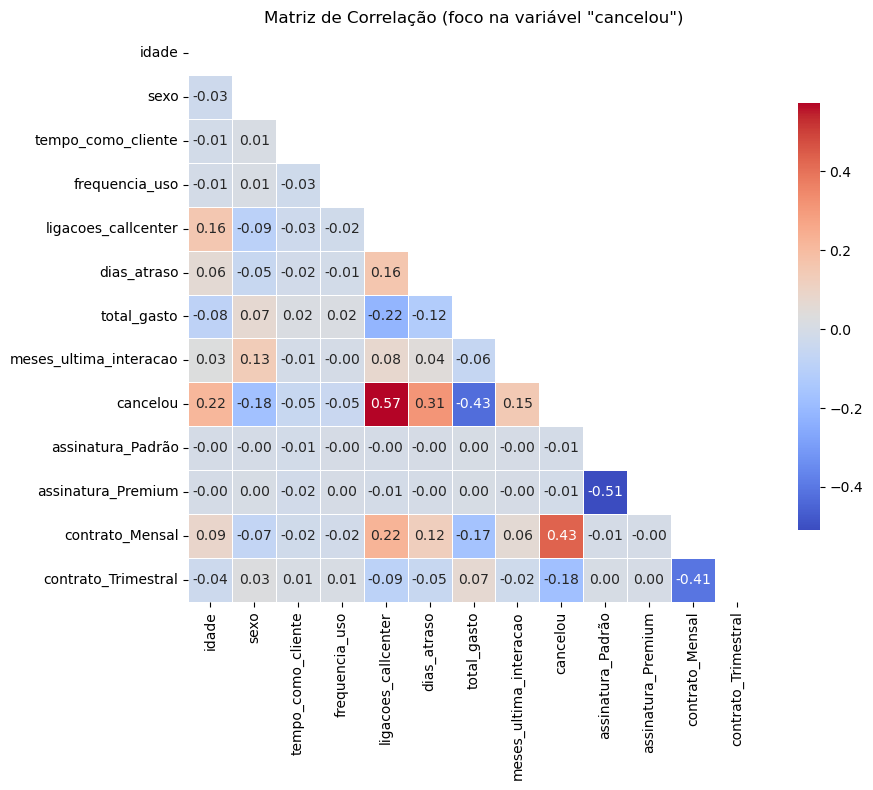

In [24]:
import numpy as np

#Plotando a Matriz de Correlação

# Calcular correlação apenas entre variáveis numéricas
correlacao = df.corr(numeric_only=True)

# Ordenar as variáveis pela correlação com a variável alvo 'cancelou'
correlacao_cancelou = correlacao['cancelou'].sort_values(ascending=False)

# Exibir correlações com a variável alvo
print("Correlação com a variável alvo 'cancelou':")
print(correlacao_cancelou)

# Filtrar correlações fortes (acima de 0.5 ou abaixo de -0.5)
correlacoes_fortes = correlacao_cancelou[abs(correlacao_cancelou) > 0.5]
print("\nVariáveis com correlação forte com 'cancelou':")
print(correlacoes_fortes)

# Criar máscara para exibir apenas a parte inferior da matriz (sem duplicação)
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Plotar matriz de correlação com melhorias
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})
plt.title('Matriz de Correlação (foco na variável "cancelou")')
plt.tight_layout()
plt.show()

Análise da Correlação com a Variável Alvo cancelou
A matriz de correlação evidencia o grau de associação entre as variáveis numéricas do conjunto de dados e a variável alvo cancelou. Os principais pontos observados foram:

A variável ligacoes_callcenter apresentou a maior correlação positiva com cancelou (0.574), sugerindo que clientes que mais ligam para o call center têm maior propensão ao cancelamento. Este é um indicativo potencial de insatisfação ou problemas não resolvidos.

As variáveis contrato_Mensal (0.43) e total_gasto (-0.43) também se destacam. Clientes com contrato mensal tendem a cancelar mais, enquanto um maior total gasto está negativamente correlacionado com o cancelamento — o que pode indicar clientes mais engajados ou satisfeitos.

Variáveis como idade, dias_atraso, e meses_ultima_interacao apresentaram correlações moderadas com a variável alvo, enquanto sexo, frequencia_uso e tipo de assinatura demonstraram correlação fraca.

In [25]:
correlacoes = df.corr()['cancelou'].sort_values(ascending=False)

for var, corr in correlacoes.items():
    if var != 'cancelou' and abs(corr) > 0.3:
        direcao = "positiva" if corr > 0 else "negativa"

        print(f"\n A variável '{var}' possui correlação {direcao} com 'cancelou' (valor = {corr:.2f}).")

        if var.lower() in ['customerid', 'id', 'clienteid']:  # tratamento especial para identificadores
            print(" Essa variável é um identificador único e não possui significado preditivo real.")
            print("Deve ser descartada antes da construção do modelo para evitar viés.")
            continue

        # Interpretação com impacto e utilidade
        if abs(corr) > 0.5:
            print("Correlação forte: essa variável pode ser um indicativo claro de cancelamento.")
        elif 0.3 < abs(corr) <= 0.5:
            print("Correlação moderada: pode contribuir para explicar o cancelamento.")

        # Complemento de análise
        print("Sugestão: Explore essa variável com outras para identificar padrões ou interações.")



 A variável 'ligacoes_callcenter' possui correlação positiva com 'cancelou' (valor = 0.57).
Correlação forte: essa variável pode ser um indicativo claro de cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.

 A variável 'contrato_Mensal' possui correlação positiva com 'cancelou' (valor = 0.43).
Correlação moderada: pode contribuir para explicar o cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.

 A variável 'dias_atraso' possui correlação positiva com 'cancelou' (valor = 0.31).
Correlação moderada: pode contribuir para explicar o cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.

 A variável 'total_gasto' possui correlação negativa com 'cancelou' (valor = -0.43).
Correlação moderada: pode contribuir para explicar o cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.


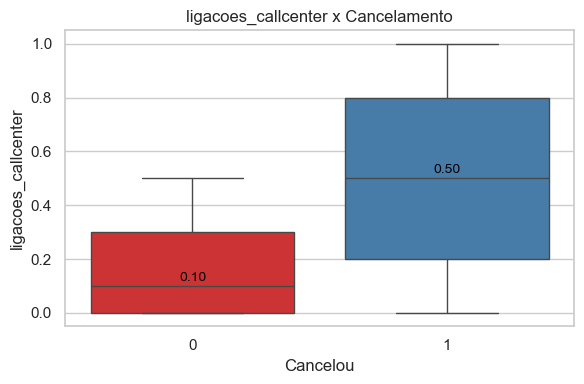


 Análise da variável 'ligacoes_callcenter':
- Clientes que cancelaram tendem a ter valores maiores de 'ligacoes_callcenter' (mediana: 0.50) comparado aos que não cancelaram (mediana: 0.10).
- Os clientes que cancelaram apresentam maior variabilidade (mais dispersos).


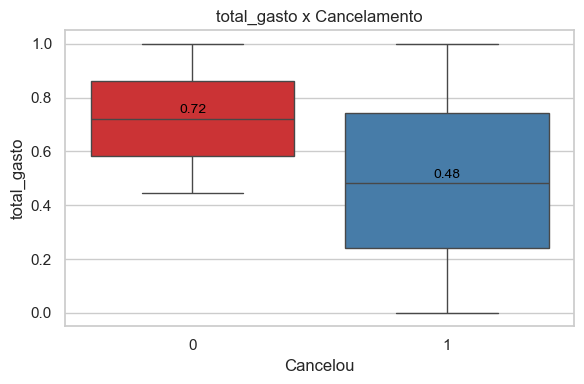


 Análise da variável 'total_gasto':
- Clientes que cancelaram tendem a ter valores menores de 'total_gasto' (mediana: 0.48) comparado aos que não cancelaram (mediana: 0.72).
- Os clientes que cancelaram apresentam maior variabilidade (mais dispersos).


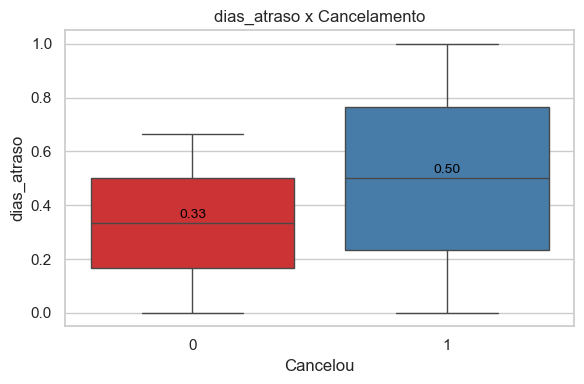


 Análise da variável 'dias_atraso':
- Clientes que cancelaram tendem a ter valores maiores de 'dias_atraso' (mediana: 0.50) comparado aos que não cancelaram (mediana: 0.33).
- Os clientes que cancelaram apresentam maior variabilidade (mais dispersos).


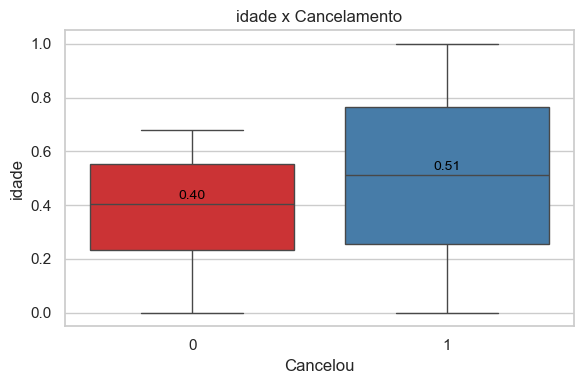


 Análise da variável 'idade':
- Clientes que cancelaram tendem a ter valores maiores de 'idade' (mediana: 0.51) comparado aos que não cancelaram (mediana: 0.40).
- Os clientes que cancelaram apresentam maior variabilidade (mais dispersos).


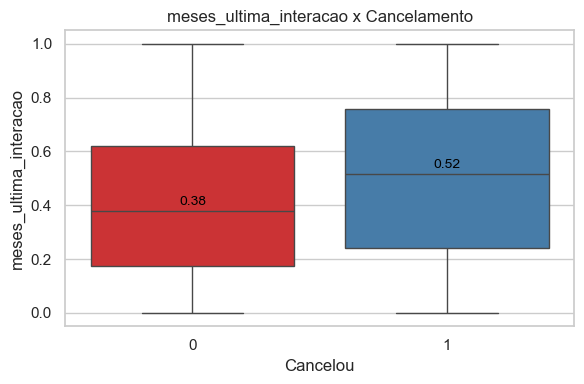


 Análise da variável 'meses_ultima_interacao':
- Clientes que cancelaram tendem a ter valores maiores de 'meses_ultima_interacao' (mediana: 0.52) comparado aos que não cancelaram (mediana: 0.38).


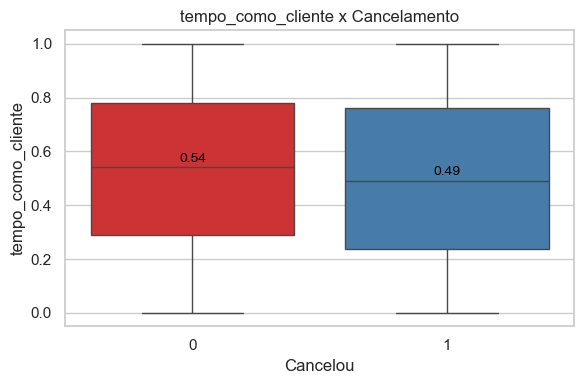


 Análise da variável 'tempo_como_cliente':
- Clientes que cancelaram tendem a ter valores menores de 'tempo_como_cliente' (mediana: 0.49) comparado aos que não cancelaram (mediana: 0.54).


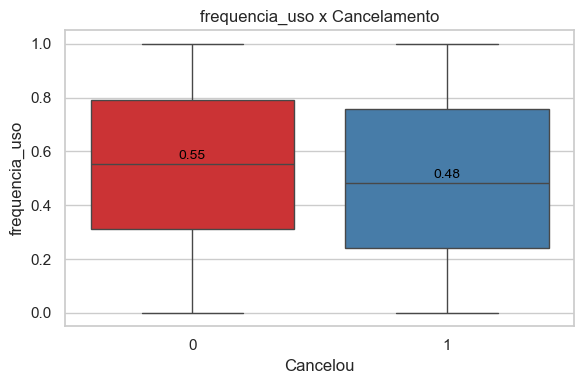


 Análise da variável 'frequencia_uso':
- Clientes que cancelaram tendem a ter valores menores de 'frequencia_uso' (mediana: 0.48) comparado aos que não cancelaram (mediana: 0.55).


In [29]:
# BloxPlot para comparar com a variável-alvo
sns.set(style="whitegrid")

# Ordenar as variáveis com base na correlação com 'cancelou'
correlacoes = df.corr()['cancelou'].abs().sort_values(ascending=False)
variaveis_ordenadas = [var for var in correlacoes.index if var in colunas_numericas]

# Plotando e interpretando
for coluna in variaveis_ordenadas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='cancelou', y=coluna, hue='cancelou', palette='Set1', legend=False)
    
    # Adicionando mediana no gráfico
    medianas = df.groupby('cancelou')[coluna].median()
    for i, med in enumerate(medianas):
        plt.text(i, med + 0.02, f'{med:.2f}', ha='center', color='black', fontsize=10)
    
    plt.title(f'{coluna} x Cancelamento')
    plt.xlabel('Cancelou')
    plt.ylabel(coluna)
    plt.tight_layout()
    plt.show()

    # --------- Interpretação após o gráfico ---------
    grupo_0 = df[df['cancelou'] == 0][coluna]
    grupo_1 = df[df['cancelou'] == 1][coluna]

    mediana_0 = grupo_0.median()
    mediana_1 = grupo_1.median()

    print(f"\n Análise da variável '{coluna}':")

    if mediana_1 > mediana_0:
        print(f"- Clientes que cancelaram tendem a ter valores maiores de '{coluna}' (mediana: {mediana_1:.2f}) comparado aos que não cancelaram (mediana: {mediana_0:.2f}).")
    elif mediana_1 < mediana_0:
        print(f"- Clientes que cancelaram tendem a ter valores menores de '{coluna}' (mediana: {mediana_1:.2f}) comparado aos que não cancelaram (mediana: {mediana_0:.2f}).")
    else:
        print(f"- A mediana de '{coluna}' é igual para ambos os grupos. Pode não haver diferença significativa.")

    # Dispersão
    iqr_0 = grupo_0.quantile(0.75) - grupo_0.quantile(0.25)
    iqr_1 = grupo_1.quantile(0.75) - grupo_1.quantile(0.25)

    if iqr_1 > iqr_0 * 1.2:
        print("- Os clientes que cancelaram apresentam maior variabilidade (mais dispersos).")
    elif iqr_1 < iqr_0 * 0.8:
        print("- Os clientes que cancelaram têm valores mais concentrados (menos variabilidade).")

    # Outliers
    outliers_1 = ((grupo_1 < grupo_1.quantile(0.25) - 1.5 * iqr_1) | 
                  (grupo_1 > grupo_1.quantile(0.75) + 1.5 * iqr_1)).sum()
    outliers_0 = ((grupo_0 < grupo_0.quantile(0.25) - 1.5 * iqr_0) | 
                  (grupo_0 > grupo_0.quantile(0.75) + 1.5 * iqr_0)).sum()

    if outliers_1 > outliers_0:
        print("- Há mais outliers entre os clientes que cancelaram.")
    elif outliers_1 < outliers_0:
        print("- Há mais outliers entre os clientes que não cancelaram.")
    


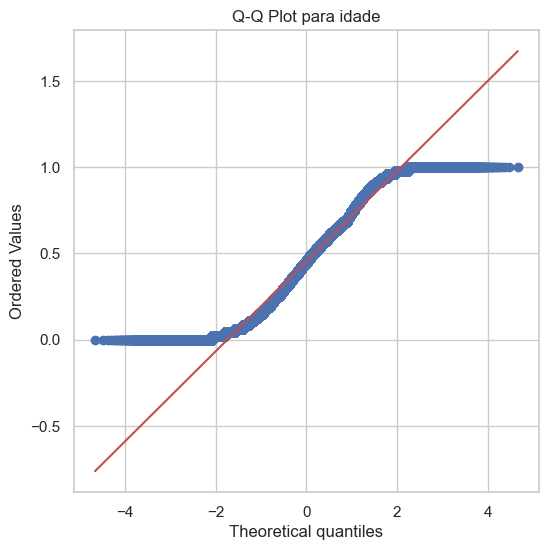

Interpretação para 'idade':
- Atenção: desvio nas caudas sugere que a distribuição não é normal.
- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.
- Coeficiente de correlação (R): 0.986 (mais próximo de 1 indica melhor ajuste)



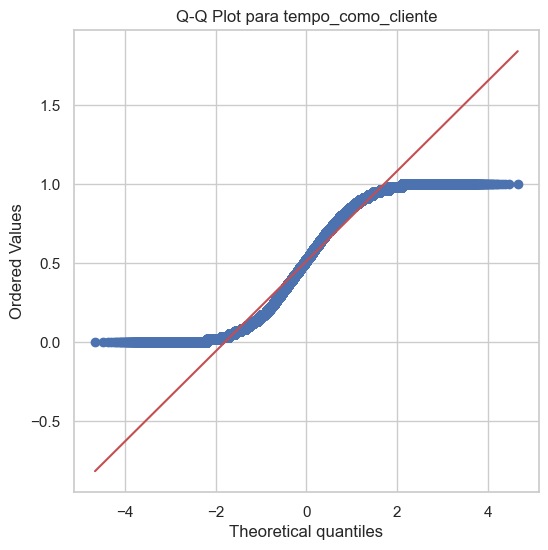

Interpretação para 'tempo_como_cliente':
- Atenção: desvio nas caudas sugere que a distribuição não é normal.
- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.
- Coeficiente de correlação (R): 0.977 (mais próximo de 1 indica melhor ajuste)



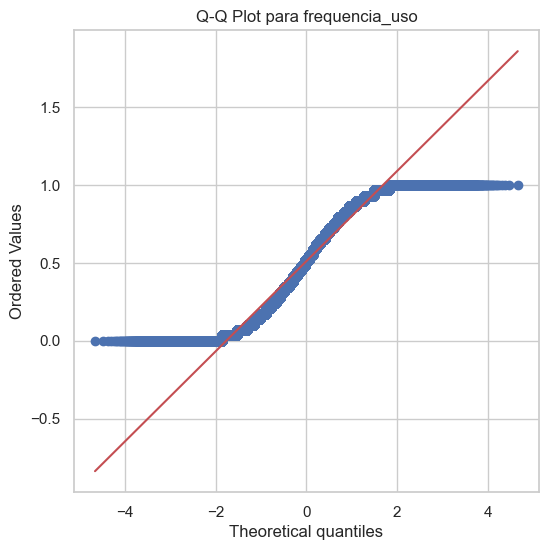

Interpretação para 'frequencia_uso':
- Atenção: desvio nas caudas sugere que a distribuição não é normal.
- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.
- Coeficiente de correlação (R): 0.977 (mais próximo de 1 indica melhor ajuste)



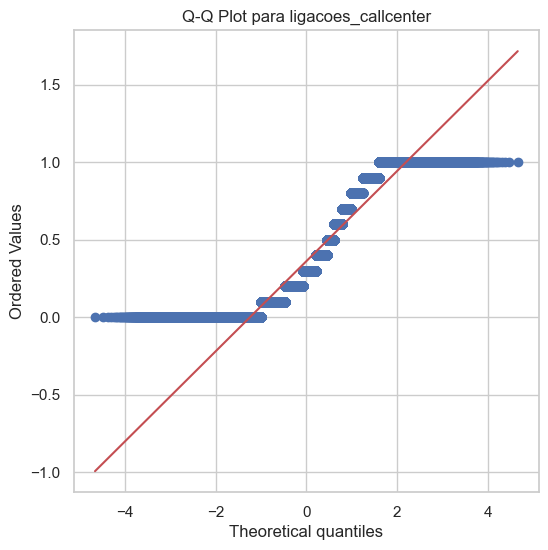

Interpretação para 'ligacoes_callcenter':
- Atenção: desvio nas caudas sugere que a distribuição não é normal.
- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.
- Coeficiente de correlação (R): 0.947 (mais próximo de 1 indica melhor ajuste)



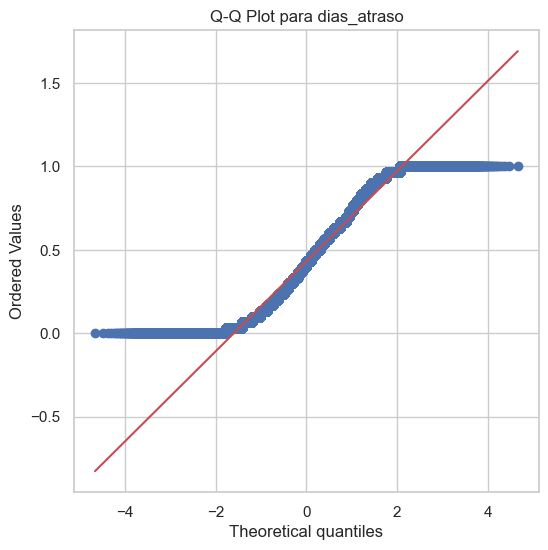

Interpretação para 'dias_atraso':
- Atenção: desvio nas caudas sugere que a distribuição não é normal.
- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.
- Coeficiente de correlação (R): 0.981 (mais próximo de 1 indica melhor ajuste)



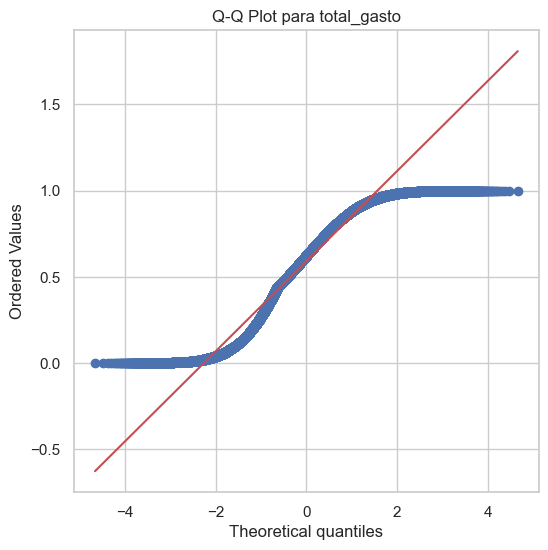

Interpretação para 'total_gasto':
- Atenção: desvio nas caudas sugere que a distribuição não é normal.
- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.
- Coeficiente de correlação (R): 0.976 (mais próximo de 1 indica melhor ajuste)



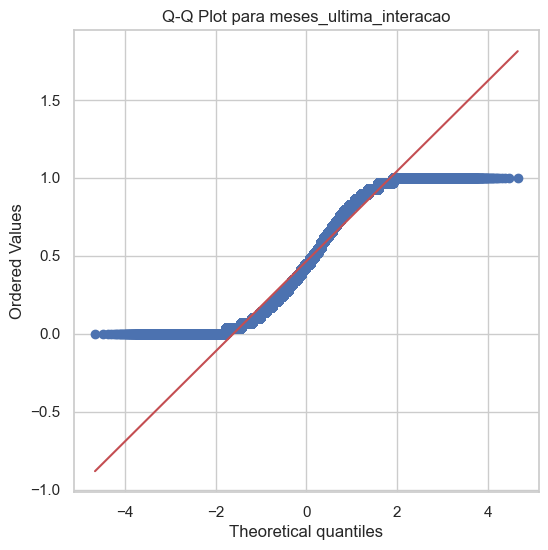

Interpretação para 'meses_ultima_interacao':
- Atenção: desvio nas caudas sugere que a distribuição não é normal.
- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.
- Coeficiente de correlação (R): 0.975 (mais próximo de 1 indica melhor ajuste)



In [31]:
#verificação do gafico Q-Q plot

def qqplot_com_interpretacao(df, colunas):
    for coluna in colunas:
        plt.figure(figsize=(6, 6))
        (osm, osr), (slope, intercept, r) = stats.probplot(df[coluna], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot para {coluna}')
        plt.show()
        
        # Calcular desvio nas caudas (extremos) dos quantis observados vs teóricos
        desvio_cauda_inferior = abs(osm[0] - osr[0])
        desvio_cauda_superior = abs(osm[-1] - osr[-1])
        
        # Definir limiar para considerar "desvio significativo"
        limiar = 0.05
        
        print(f"Interpretação para '{coluna}':")
        
        if desvio_cauda_inferior > limiar or desvio_cauda_superior > limiar:
            print("- Atenção: desvio nas caudas sugere que a distribuição não é normal.")
            print("- Pode ter caudas pesadas (mais valores extremos que o normal) ou leve assimetria.")
        else:
            print("- Distribuição próxima da normal, pontos alinhados na diagonal.")
        
        print(f"- Coeficiente de correlação (R): {r:.3f} (mais próximo de 1 indica melhor ajuste)\n")

# Exemplo de uso
colunas_numericas = ['idade', 'tempo_como_cliente', 'frequencia_uso', 
                    'ligacoes_callcenter', 'dias_atraso', 'total_gasto', 'meses_ultima_interacao']

qqplot_com_interpretacao(df, colunas_numericas)



## 3. SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [33]:
# DataFrame tratado e pronto para a divisão de treino e teste

df = pd.read_csv('cancelamentos_normalizacao.csv')

X = df.drop('cancelou', axis=1)
y = df['cancelou']

# Stratify para manter proporção das classes
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_treino: {X_treino.shape}")
print(f"X_teste: {X_teste.shape}")
print(f"y_treino: {y_treino.shape}")
print(f"y_teste: {y_teste.shape}")

print("Distribuição em y_treino:")
print(y_treino.value_counts(normalize=True))

print("Distribuição em y_teste:")
print(y_teste.value_counts(normalize=True))

# Pasta onde os arquivos de treino e teste ficarão salvos
pasta = '../Dados_Treino_Teste'

# Salvando os dados de treino e teste na pasta correta
X_treino.to_csv(f'{pasta}/X_treino.csv', index=False)
X_teste.to_csv(f'{pasta}/X_teste.csv', index=False)
y_treino.to_csv(f'{pasta}/y_treino.csv', index=False)
y_teste.to_csv(f'{pasta}/y_teste.csv', index=False)

print("Os dados de treino e teste foram salvos com sucesso na pasta 'Dados_Treino_Teste'.")


X_treino: (352665, 12)
X_teste: (88167, 12)
y_treino: (352665,)
y_teste: (88167,)
Distribuição em y_treino:
cancelou
1    0.567108
0    0.432892
Name: proportion, dtype: float64
Distribuição em y_teste:
cancelou
1    0.567106
0    0.432894
Name: proportion, dtype: float64
Os dados de treino e teste foram salvos com sucesso na pasta 'Dados_Treino_Teste'.
